In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/kkelley/Desktop/CBB Results/CBBML.csv')


In [27]:
print(df[df.isnull().any(axis=1)])


       Date  Away Team  Home Team  Away Score  Home Score  Away OR  Away DR  \
462  2/8/25        NaN        273          75         114      NaN      NaN   

     Away AT  Home OR  Home DR  Home AT  delta OR  delta DR  delta AT  
462      NaN    101.4    105.7     68.7       NaN       NaN       NaN  


In [28]:
df.dropna(inplace=True)

In [29]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date, Away Team, Home Team, Away Score, Home Score, Away OR, Away DR, Away AT, Home OR, Home DR, Home AT, delta OR, delta DR, delta AT]
Index: []


In [37]:
# Round numeric columns to 2 decimal places for clarity
df = df.round(2)

# Extract columns relevant for unsupervised learning (you can adjust as necessary)
features = [
            'Away OR', 'Away DR', 'Away AT', 'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT']

# Select only the numeric columns
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

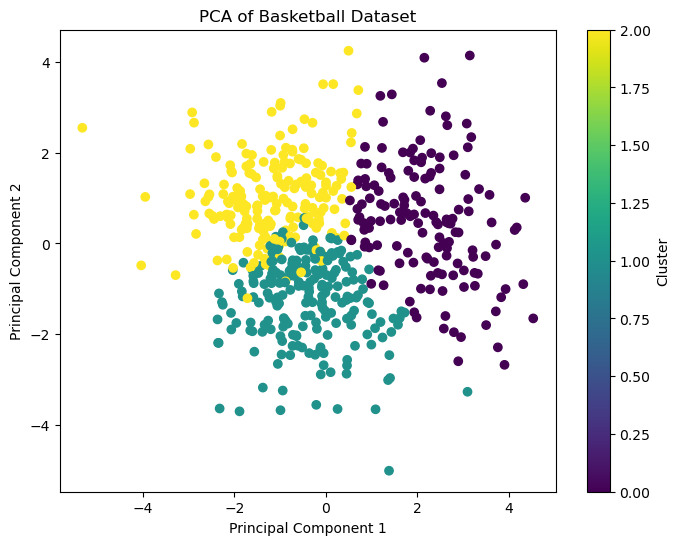

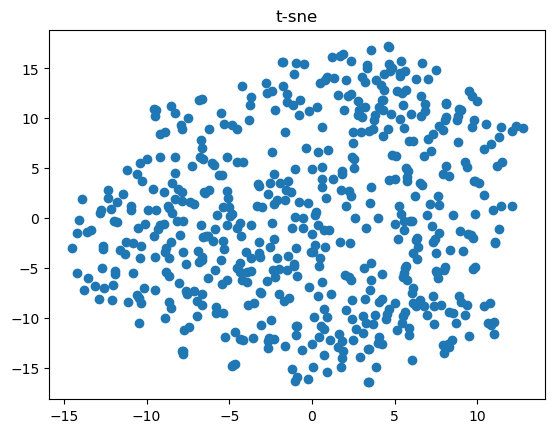

[[ 11.428014    9.115781 ]
 [  1.101783  -12.23045  ]
 [ -5.843913   -5.251166 ]
 ...
 [  7.296641    8.474451 ]
 [  7.495935   14.81983  ]
 [  1.1953492  16.104137 ]]
here I am
           0          1
0  11.428014   9.115781
1   1.101783 -12.230450
2  -5.843913  -5.251166
3 -14.199269  -5.509910
4   4.641435  15.448659
Cluster centers (in original feature space):
[[ 1.11755372 -1.12624467 -0.007021    1.10995195 -1.11309882  0.07166771
  -0.07200574  0.04751695  0.05432214]
 [-0.18290598  0.31856473  0.56139969 -0.53550459  0.37067147 -0.55179037
  -0.36763372  0.04082471 -0.77152813]
 [-0.63429244  0.4927236  -0.60745608 -0.24380431  0.4260465   0.54872983
   0.45495478 -0.08001169  0.80148829]]
Cluster
1    215
2    197
0    147
Name: count, dtype: int64


In [42]:
tsne = TSNE(n_components=2,perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy visualization
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Set the number of clusters you want to create
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("PCA of Basketball Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

plt.scatter(X_tsne[:, 0], X_tsne[:,1])
plt.title('t-sne')
plt.show()
print(X_tsne)
dftsne = pd.DataFrame(X_tsne)
print('here I am')
print(dftsne.head())

# Examine the cluster centers (centroids)
print("Cluster centers (in original feature space):")
print(kmeans.cluster_centers_)

# Check the distribution of clusters
print(df['Cluster'].value_counts())
